# Personality Text Classifier EDA

In [1]:
#Import libraries
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

%matplotlib inline

In [2]:
#change directory
os.chdir('D:\\')

In [3]:
#import melted data set and check head
df_melt=pd.read_csv('mbt_1_Melted.csv',encoding='latin1')
df_melt.head()

,type,individualPosts,text_length
0,ENTP,I'm finding the lack of me in these posts very...,56
1,INTJ,"Dear INTP, I enjoyed our conversation the ot...",188
2,ENTJ,You're fired.,13
3,INTJ,18/37 @.@,9
4,INFJ,"No, I can't draw on my own nails (haha). Those...",191


In [4]:
#check tail
df_melt.tail()

,type,individualPosts,text_length
396308,ISFP,"Also, what moderate even means changes dependi...",196
396309,ENFP,My lovelife is nonexistant. Recently (basica...,202
396310,INTP,This is a loaded question. As for me I'm 19 ...,188
396311,INFP,"Wait, leafstone, third volume of 1Q84? Was th...",201
396312,INFP,I would never want to turn off my emotions. so...,112


In [5]:
#Get info
df_melt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 396313 entries, 0 to 396312
Data columns (total 3 columns):
type               396313 non-null object
individualPosts    395472 non-null object
text_length        396313 non-null int64
dtypes: int64(1), object(2)
memory usage: 9.1+ MB


In [6]:
#get info on stats of text_length column
df_melt.describe()

,text_length
count,396313.000000
mean,148.705642
std,70.287985
min,0.000000
25%,91.000000
50%,194.000000
75%,199.000000
max,4353.000000


There is at least one entry with no text and one with length of 4353. The larger could be an outlier(s).

In [7]:
#Finding the outliers
df_melt[df_melt.text_length==0]

,type,individualPosts,text_length
8114,INFP,NaN,0
15885,INFP,NaN,0
15996,ENTJ,NaN,0
18236,INFP,NaN,0
22552,INFJ,NaN,0
23979,INFP,NaN,0
24094,ENTJ,NaN,0
24196,ENFP,NaN,0
24359,INFP,NaN,0
24743,ISTP,NaN,0


So there are 839 rows that have null posts. We will drop them then recheck the summary statistics on them. First we will use missingno to confirm visually.

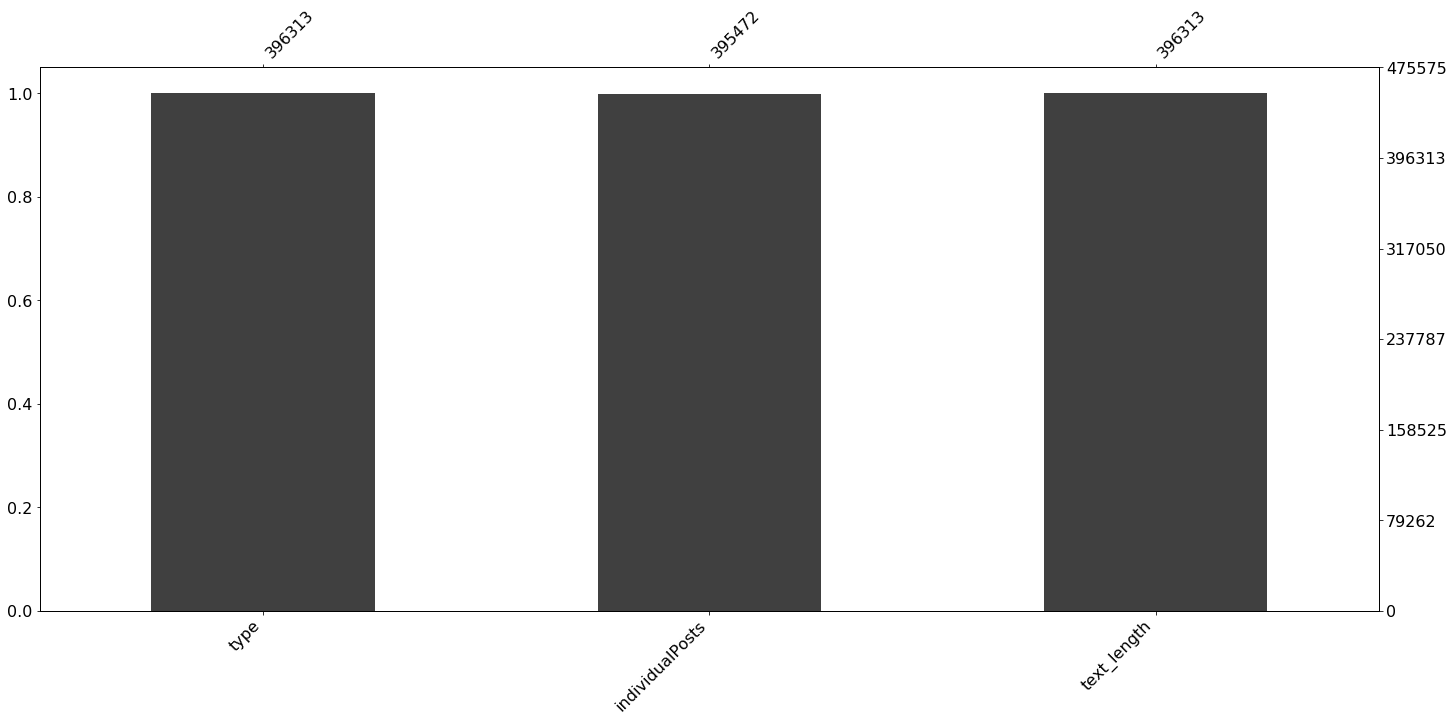

In [8]:
import missingno as msno
msno.bar(df_melt)

In [9]:
#Confirm difference
396313-395472
#got 841, two more than listed...

841

In [10]:
#check with total of null entries in posts column
len(df_melt[df_melt['individualPosts'].isnull()==True])
#also says 841...need to check for the two that are not considered length of zero

841

In [11]:
df_melt[(df_melt['individualPosts'].isnull()==True) & (df_melt.text_length!=0)]
#two entries that are null in the posts columns were considered to have a length of 3. Why?

,type,individualPosts,text_length
191388,INTJ,NaN,3
199479,INTJ,NaN,3


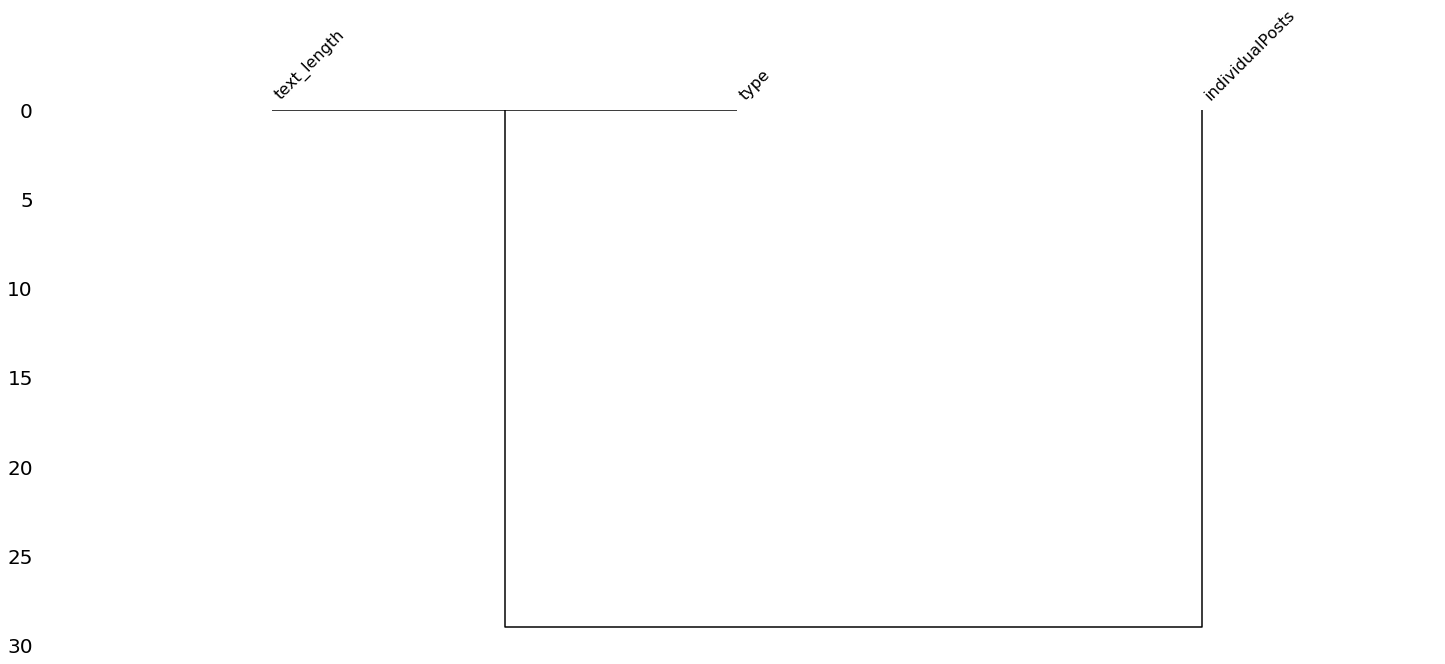

In [12]:
#experimenting with dendrogram function of missingno 
msno.dendrogram(df_melt)
#chart suggests that filling in type and text_length are correlated. Need to look more into how to read this for the 
#other part with individualPosts

In [13]:
#dropping null values
df_melt=df_melt[df_melt['individualPosts'].isnull()==False]

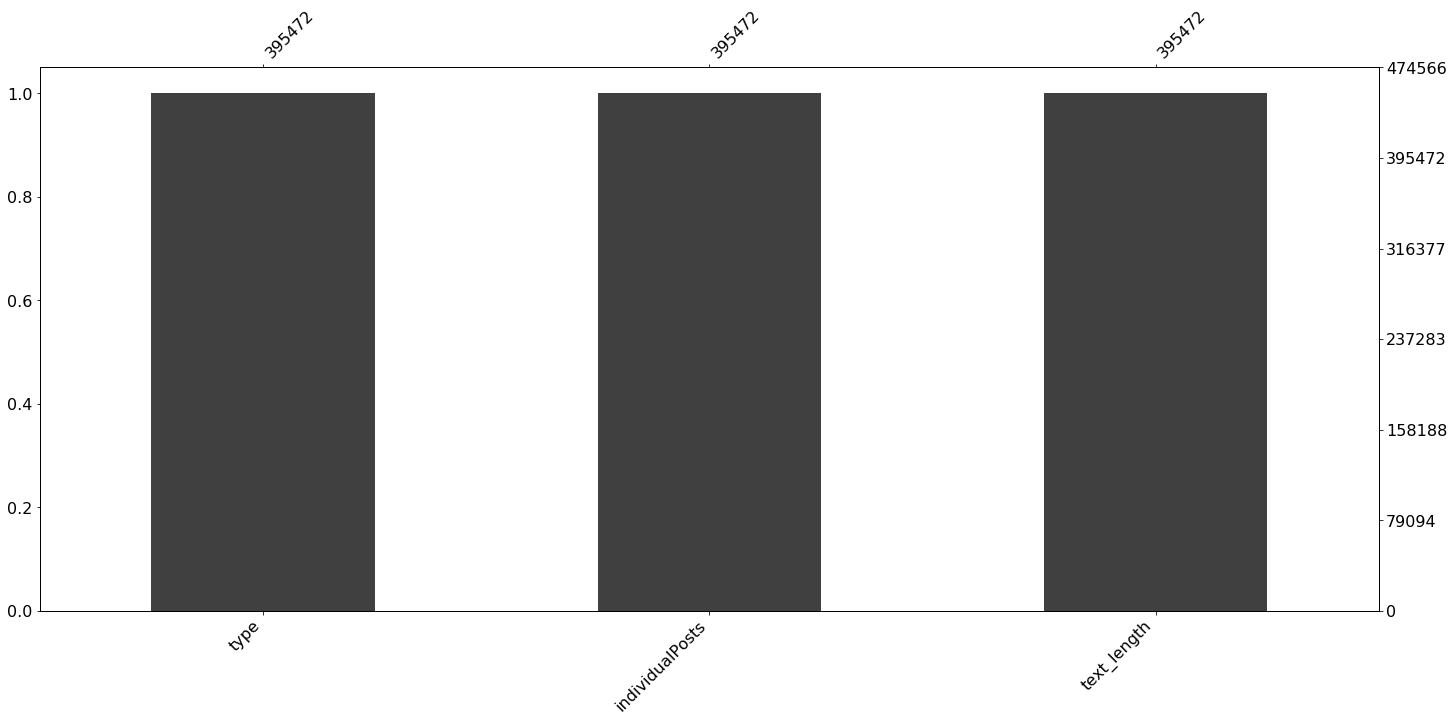

In [14]:
#check bar chart again
msno.bar(df_melt)
#all nulls are gone

In [15]:
#see personality types
df_melt['type'].unique()

array(['ENTP', 'INTJ', 'ENTJ', 'INFJ', 'INTP', 'INFP', 'ENFP', 'ISFP',
       'ISTP', 'ISFJ', 'ENFJ', 'ISTJ', 'ESTP', 'ESFP', 'ESTJ', 'ESFJ'], dtype=object)

In [16]:
#get total number of combinations
len(df_melt['type'].unique())

16

In [17]:
#get bar chart showing totals of each type
type_counts= df_melt['type'].value_counts()

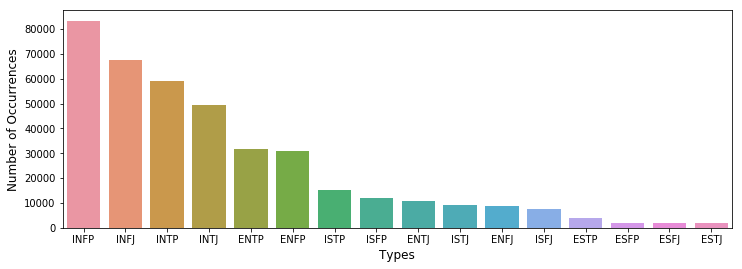

In [18]:
#plotting bar chart
plt.figure(figsize=(12,4))
sns.barplot(type_counts.index, type_counts.values)
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('Types', fontsize=12)
plt.show()

It seems that most of the personality types in this data set are mostly introverts. The four highest totals are introverts, particularly of the IN type. We could create a column classifying that types as introvert and extrovert (I or E) and then build a binary classifier (definitely try logistic regresssion with this classification since we would create a binary classifier).

Maybe this means that introverts are more likely to type online content versus extroverts? Will need to check percentage differences.

In [19]:
#percentage differences of each personality type
total=np.float(df_melt.shape[0])
for personality in df_melt['type'].unique().tolist():
    print('{} percentage: {}\n'.format(personality,df_melt[df_melt.type==personality].shape[0]/total*100))

ENTP percentage: 8.050380305053203

INTJ percentage: 12.473955172553303

ENTJ percentage: 2.6977889711534573

INFJ percentage: 17.06492495043897

INTP percentage: 14.92697333818829

INFP percentage: 21.08088562527815

ENFP percentage: 7.837217299834122

ISFP percentage: 3.0088097260994457

ISTP percentage: 3.8586802605494195

ISFJ percentage: 1.916444147752559

ENFJ percentage: 2.2277177651009428

ISTJ percentage: 2.3397358093619776

ESTP percentage: 1.0306671521624793

ESFP percentage: 0.527470971396205

ESTJ percentage: 0.45995670995671

ESFJ percentage: 0.4983917951207671



In [20]:
#summing the 4 largest precentages of the personality types
21.08088562527815+14.92697333818829+17.06492495043897+12.473955172553303

65.54673908645871

So the first 4 categories alone make up about 66% of the personalities in this data set. They are also all introverts with intuition (the meaning of the N in the coding). This reinforces the idea that introverts write more online content than extroverts. In particular the ones with a sense of intuition.

In [21]:
#create a column to convert classify each personality as extrovert(I) or introvert(E)
df_melt['IntroExtro']=df_melt['type'].apply(lambda x: 'Introvert' if x[0]=='I' else 'Extrovert')
df_melt.head()

,type,individualPosts,text_length,IntroExtro
0,ENTP,I'm finding the lack of me in these posts very...,56,Extrovert
1,INTJ,"Dear INTP, I enjoyed our conversation the ot...",188,Introvert
2,ENTJ,You're fired.,13,Extrovert
3,INTJ,18/37 @.@,9,Introvert
4,INFJ,"No, I can't draw on my own nails (haha). Those...",191,Introvert


In [22]:
#determine percentage of introverts and extroverts in the data set.
print('Introvert percentage: {}\n'.format(df_melt[df_melt.IntroExtro=='Introvert'].shape[0]/total*100))
print('Extrovert percentage: {}\n'.format(df_melt[df_melt.IntroExtro=='Extrovert'].shape[0]/total*100))

Introvert percentage: 76.67040903022212

Extrovert percentage: 23.329590969777886



More than 3/4 of the data set has introvert personalities. Again reinforcing the hypothesis that introverts write more online than extroverts since extroverts by nature are more offline social. 

Let's get more info on the text_length

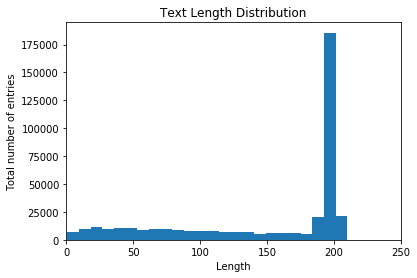

In [23]:
#distribution. Changed xlim to 250 since the 75% mark of the data is at about 200 
plt.hist(df_melt.text_length, bins=500)
plt.title('Text Length Distribution')
plt.xlim(0,250)
plt.xlabel('Length')
plt.ylabel('Total number of entries')
plt.show()

This subset of the data is left-skewed. Let's look at the box plot to see how the outliers

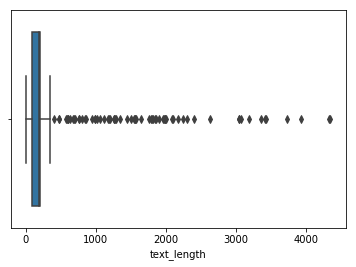

In [24]:
sns.boxplot(df_melt['text_length'])

plt.show()

So there are quite a few outliers...We need to get specific's now.

In [34]:
#get number of entries greater than particular amounts of characters
print('Percentage of Entries <=250: {}\n'.format(df_melt[df_melt.text_length<=250].shape[0]))
print('Percentage of Entries >250: {}\n'.format(df_melt[df_melt.text_length>250].shape[0]))
print('Number of Entries >500: {}\n'.format(df_melt[df_melt.text_length>500].shape[0]))
print('Number of Entries >1000: {}\n'.format(df_melt[df_melt.text_length>1000].shape[0]))
print('Number of Entries >2000: {}\n'.format(df_melt[df_melt.text_length>2000].shape[0]))
print('Number of Entries >3000: {}\n'.format(df_melt[df_melt.text_length>3000].shape[0]))
print('Number of Entries >4000: {}\n'.format(df_melt[df_melt.text_length>4000].shape[0]))

Percentage of Entries <=250: 395400

Percentage of Entries >250: 72

Number of Entries >500: 64

Number of Entries >1000: 48

Number of Entries >2000: 19

Number of Entries >3000: 11

Number of Entries >4000: 2



In [35]:
#get percentages of the above
print('Percentage of Entries <=250: {}\n'.format(df_melt[df_melt.text_length<=250].shape[0]/total*100))
print('Percentage of Entries >250: {}\n'.format(df_melt[df_melt.text_length>250].shape[0]/total*100))
print('Percentage of Entries >500: {}\n'.format(df_melt[df_melt.text_length>500].shape[0]/total*100))
print('Percentage of Entries >1000: {}\n'.format(df_melt[df_melt.text_length>1000].shape[0]/total*100))
print('Percentage of Entries >2000: {}\n'.format(df_melt[df_melt.text_length>2000].shape[0]/total*100))
print('Percentage of Entries >3000: {}\n'.format(df_melt[df_melt.text_length>3000].shape[0]/total*100))
print('Percentage of Entries >4000: {}\n'.format(df_melt[df_melt.text_length>4000].shape[0]/total*100))

Percentage of Entries <=250: 99.98179390702755

Percentage of Entries >250: 0.01820609297244811

Percentage of Entries >500: 0.016183193753287212

Percentage of Entries >1000: 0.012137395314965408

Percentage of Entries >2000: 0.00480438564550714

Percentage of Entries >3000: 0.0027814864263462392

Percentage of Entries >4000: 0.0005057248047902254



Almost all of the entries are 250 characters are list. Let's look at words instead. Perhaps that will give us a better idea of how much introverts and extroverts write. Then we can go into some sentiment analysis also in addition to the classification.

In [37]:
#create word count column
df_melt['wordCount']=df_melt['individualPosts'].apply(lambda x: len(x.split()))
df_melt.head()

,type,individualPosts,text_length,IntroExtro,wordCount
0,ENTP,I'm finding the lack of me in these posts very...,56,Extrovert,11
1,INTJ,"Dear INTP, I enjoyed our conversation the ot...",188,Introvert,30
2,ENTJ,You're fired.,13,Extrovert,2
3,INTJ,18/37 @.@,9,Introvert,2
4,INFJ,"No, I can't draw on my own nails (haha). Those...",191,Introvert,37


In [38]:
#check out the summary statistics of wordCount column
df_melt.describe()

,text_length,wordCount
count,395472.000000,395472.000000
mean,149.021860,27.403798
std,70.027035,13.073046
min,1.000000,1.000000
25%,92.000000,17.000000
50%,194.000000,33.000000
75%,199.000000,37.000000
max,4353.000000,747.000000


Again there is at least an extremely large outlier 